In [6]:
# Access your C code
from ctypes import *
so_file = "./mylib.so"
c_functions = ctypes.CDLL(so_file)

In [2]:
def init():
    #c_functions.init.restype =  ctypes.c_void
    c_functions.init.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                 ctypes.c_double, ctypes.c_double, ctypes.c_double,)
    return c_functions.init

In [3]:
def alloc():
    #c_functions.alloc.restype =  ctypes.c_void
    #c_functions.alloc.argtypes = (ctypes.c_void,)
    return c_functions.alloc
def release():
    #c_functions.release.restype =  ctypes.c_void
    #c_functions.release.argtypes = (ctypes.c_void,)
    return c_functions.release

In [4]:
def apply():
    c_functions.apply.restype =  ctypes.c_int
    c_functions.apply.argtypes = (ctypes.c_double,
                                  ctypes.POINTER(ctypes.c_double),
                                  ctypes.POINTER(ctypes.c_double),
                                  ctypes.POINTER(ctypes.c_double))
    return c_functions.apply

In [13]:
m = c_double()
g = c_double()
R = c_double()
p0 = c_double()
q0 = c_double()
t0 = c_double()

m.value = 1.0
g.value = 1.0
R.value = 1.0
p0.value = 0.0001
q0.value = 0.0
t0.value = 0.0
init()(m,g,R,p0,q0,t0)

6

In [14]:
alloc()()

-493621472

In [15]:
ti = c_double()
t = c_double()
y0 = c_double()
y1 = c_double()

In [16]:
t_y0 = []
t_y1 = []
import numpy as np
for t_i in np.arange(0.0, 24.0, 0.01):
    ti.value = t_i
    apply()(ti, byref(t), byref(y0), byref(y1))
    # print(t_i, t.value, y0.value, y1.value)
    t_y0 += [(t.value, y0.value)]
    t_y1 += [(t.value, y1.value)]

In [17]:
release()()

0

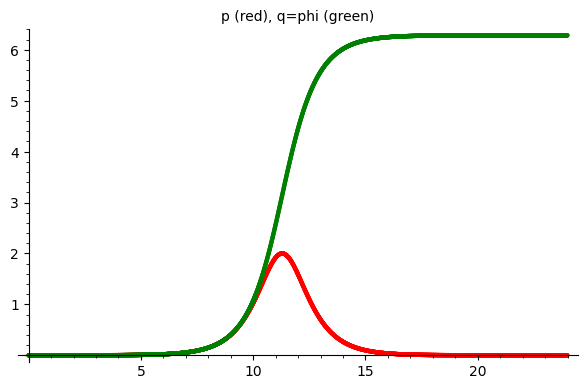

In [18]:
p = list_plot(t_y0, color="red")
p+= list_plot(t_y1, color="green")
p.show(title="p (red), q=phi (green)")